In [2]:
import glob
import re
import numpy as np
import math
import json
import random
import greycode_quantization as quan
import matplotlib.pyplot as plt

In [ ]:
dir_in = "CSI_data/processed_with_ros/UAV/*.txt"
dir_out = "CSI_data/processed_with_ros/GCS/*.txt"
dir_imu = "CSI_data/processed_with_ros/ROS/IMU/*.json"
dir_pos = "CSI_data/processed_with_ros/ROS/POS/*.json"
data_name = "csi_data"
imu_name = "imu_data"
pos_name = "position_data"
SUBCARRIER = 64
NO_USE_SUB = [0, 1, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]

In [4]:
list_in = glob.glob(dir_in)
list_out = glob.glob(dir_out)
list_imu = glob.glob(dir_imu)
list_pos = glob.glob(dir_pos)
print(list_in)
print(list_out)
print(list_imu)
print(list_pos)

['CSI_data/processed_with_ros/UAV\\csi_data11.txt', 'CSI_data/processed_with_ros/UAV\\csi_data20.txt', 'CSI_data/processed_with_ros/UAV\\csi_data21.txt', 'CSI_data/processed_with_ros/UAV\\csi_data25.txt', 'CSI_data/processed_with_ros/UAV\\csi_data26.txt', 'CSI_data/processed_with_ros/UAV\\csi_data27.txt', 'CSI_data/processed_with_ros/UAV\\csi_data28.txt', 'CSI_data/processed_with_ros/UAV\\csi_data3.txt', 'CSI_data/processed_with_ros/UAV\\csi_data30.txt', 'CSI_data/processed_with_ros/UAV\\csi_data31.txt', 'CSI_data/processed_with_ros/UAV\\csi_data9.txt']
['CSI_data/processed_with_ros/GCS\\csi_data11.txt', 'CSI_data/processed_with_ros/GCS\\csi_data20.txt', 'CSI_data/processed_with_ros/GCS\\csi_data21.txt', 'CSI_data/processed_with_ros/GCS\\csi_data25.txt', 'CSI_data/processed_with_ros/GCS\\csi_data26.txt', 'CSI_data/processed_with_ros/GCS\\csi_data27.txt', 'CSI_data/processed_with_ros/GCS\\csi_data28.txt', 'CSI_data/processed_with_ros/GCS\\csi_data3.txt', 'CSI_data/processed_with_ros/GCS

In [5]:
def uav_csi_data_extract(data):
    result = []
    data = data.split("\n")
    for d in data:
        if d == "":
            continue
        else:
            d = d.split(" ")
            # print(d)
            timestamp = d[0] + " " + d[1][:11]
            csi_data = [int(d[2].split(",")[3]) - int(d[2].split(",")[4])] + d[2].split(",")[6:-1]
            csi_data = list(map(float, csi_data))
            csi_data = np.array(csi_data, dtype=float).tolist()
            csi_data = [timestamp] + csi_data
            result.append(csi_data)
    # print(result)
    return result

In [6]:
def gcs_csi_data_extract(data):
    result = re.findall("serial_num:.*\n",data)  #find serial_num
    # print(result)
    for i,v in enumerate(result):
        result[i] = v.split(',')
        result[i] = result[i][1:-1]
        result[i] = [int(result[i][2]) - int(result[i][3])]+result[i][5:]
        result[i] = np.array(result[i],dtype=float)
        result[i] = result[i].tolist()
        # print(result[i])
    return result

|csi_dataset_index|serial_num|CSIdata|rssi+csi|

In [7]:
set_in = []
set_out = []

for data_in in list_in:
    with open(data_in, 'r') as f:
        set_in.append(uav_csi_data_extract(f.read()))

for data_out in list_out:
    with open(data_out, 'r') as f:
        set_out.append(gcs_csi_data_extract(f.read()))

In [8]:
print(len(set_in),len(set_in[0]),len(set_in[0][0]))
print(type(set_in),type(set_in[0]),type(set_in[0][0]))
print(len(set_out),len(set_out[0]),len(set_out[0][0]))
# print(set_in)
# print(set_in[0][0])
# print(set_out[0][0])
sum = 0
for i in range(len(set_in)):
    sum += len(set_in[i])
print(sum)
print(set_in[0][0])


11 1104 130
<class 'list'> <class 'list'> <class 'list'>
11 1104 129
10259
['2024-08-27 14:18:31.03', 58.0, 0.0, 32.0, 0.0, 2.0, 18.0, -14.0, 18.0, -14.0, 18.0, -13.0, 18.0, -13.0, 18.0, -12.0, 18.0, -11.0, 18.0, -10.0, 19.0, -10.0, 19.0, -9.0, 20.0, -8.0, 20.0, -8.0, 20.0, -8.0, 21.0, -8.0, 21.0, -8.0, 21.0, -8.0, 20.0, -8.0, 20.0, -9.0, 20.0, -9.0, 19.0, -9.0, 18.0, -9.0, 17.0, -9.0, 16.0, -9.0, 16.0, -9.0, 16.0, -10.0, 16.0, -10.0, 4.0, -3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, -4.0, 15.0, -14.0, 14.0, -15.0, 14.0, -17.0, 13.0, -18.0, 12.0, -19.0, 12.0, -21.0, 11.0, -22.0, 10.0, -22.0, 9.0, -22.0, 9.0, -23.0, 8.0, -24.0, 7.0, -24.0, 6.0, -23.0, 6.0, -22.0, 6.0, -21.0, 6.0, -20.0, 7.0, -19.0, 8.0, -18.0, 9.0, -18.0, 10.0, -18.0, 10.0, -17.0, 11.0, -16.0, 12.0, -15.0, 13.0, -15.0, 15.0, -14.0, 16.0, -15.0]


In [9]:
# imu_data example
# {"timestamp_ros": "2024-08-08 16:45:07.68", "orientation": {"x": 0.00863349965016348, "y": -0.0012863370864765857, "z": -0.10452981912648052, "w": -0.9944834462845904}, "angular_velocity": {"x": -0.030356643721461296, "y": 0.01238285657018423, "z": -0.0007226443849504009}, "linear_acceleration": {"x": -0.3530394, "y": -0.2745861999999987, "z": 10.16949605}, "euler_angles": {"roll": -0.016903789713978917, "pitch": 0.004363412037491678, "yaw": 0.20941336552170298}}
# {"timestamp_ros": "2024-08-08 16:45:07.78", "orientation": {"x": 0.009931497713941376, "y": -0.002263969032579644, "z": -0.10536588985665751, "w": -0.9943813499116383}, "angular_velocity": {"x": 0.0014312488492578268, "y": 0.02821457944810391, "z": 0.04258834198117256}, "linear_acceleration": {"x": 0.1569064, "y": 0.5589790500000013, "z": 10.1204628}, "euler_angles": {"roll": -0.019275914877653268, "pitch": 0.006595427170395732, "yaw": 0.2110710899021964}}
# {"timestamp_ros": "2024-08-08 16:45:07.88", "orientation": {"x": 0.00405750811494647, "y": -0.0031414899863230657, "z": -0.10877028781528636, "w": -0.9940536666383475}, "angular_velocity": {"x": 0.005802585743367672, "y": 0.0412806160748005, "z": 0.04979967325925826}, "linear_acceleration": {"x": 0.02941995, "y": 0.7943386500000013, "z": 9.87529655}, "euler_angles": {"roll": -0.007383614778518827, "pitch": 0.007128352299332501, "yaw": 0.2179483930256706}}
# ...

def imu_data_extract(data):
    result = []
    for line in data:
        try:
            d = json.loads(line.strip())
            d["timestamp_ros"] = d["timestamp_ros"][:22]
            result.append(d)
        except json.JSONDecodeError:
            continue
    return result

In [10]:
def pos_data_extract(data):
    result = []
    for line in data:
        try:
            d = json.loads(line.strip())
            d["timestamp_ros"] = d["timestamp_ros"][:22]
            result.append(d)            
        except json.JSONDecodeError:
            continue
    return result

In [11]:
set_imu = []
set_pos = []
     
for data_imu in list_imu:
    with open(data_imu,'r') as f_imu:
        set_imu.append(imu_data_extract(f_imu))

for data_pos in list_pos:
    with open(data_pos,'r') as f_pos:
        set_pos.append(pos_data_extract(f_pos))


In [12]:
# print(set_pos)
print(set_pos[0][0]['timestamp_ros'])
print(set_pos[0][0]['horizontal_velocity'])
print(set_pos[0][0]['position'])
# print(len(set_pos[12]))
for i in range(len(set_pos)):
    print(i, len(set_pos[i]))


2024-08-27 14:18:30.05
0.03605551275463989
{'x': -0.4241097739749621, 'y': -0.3101705802437652, 'z': 1.585}
0 4509
1 5437
2 4570
3 5619
4 5876
5 4499
6 2964
7 808
8 2234
9 2417
10 3063
11 3595
12 3427


In [13]:
key = ['x', 'y', 'z', 'pitch', 'roll', 'yaw']
used = [0, 1, 2, 3, 4, 5, 10, 11]

with open("data_test.txt", 'w') as f:
    for i in range(3):
        f.write('# ' + key[i] + '\n')
        for j in range(len(used)):
            for k in range(3000):
                f.write(str(set_pos[used[j]][k]['position'][key[i]]) + '\n')
    for i in range(3):
        f.write('# ' + key[i+3] + '\n')
        for j in range(len(used)):
            for k in range(3000):
                f.write(str(set_imu[used[j]][k]['euler_angles'][key[i+3]]) + '\n')


In [14]:
with open("data_test_2.txt", 'w') as f:
    for i in range(3):
        f.write('# ' + key[i] + '\n')
        for j in range(2000):
            f.write(str(set_pos[9][j]['position'][key[i]]) + '\n')
    for i in range(3):
        f.write('# ' + key[i+3] + '\n')
        for j in range(2000):
            f.write(str(set_imu[9][j]['euler_angles'][key[i+3]]) + '\n')

In [15]:
# normal test/train data
set_in_speed = []
set_out_speed = []
set_in_speed_label = []
set_out_speed_label = []

# hover test/train data
set_in_speed_hover = []
set_out_speed_hover = []
set_in_speed_label_hover = []
set_out_speed_label_hover = []

# slow test/train data
set_in_speed_slow = []
set_out_speed_slow = []
set_in_speed_label_slow = []
set_out_speed_label_slow = []

# fast test/train data
set_in_speed_fast = []
set_out_speed_fast = []
set_in_speed_label_fast = []
set_out_speed_label_fast = []

# moving test/train data
set_in_speed_moving = []
set_out_speed_moving = []


for i in range(len(set_in)):
    # normal
    speed_in = []
    speed_out = []
    # speed_in_label = []
    # speed_out_label = []
    
    for j in range(len(set_in[i])):
        index = 0
        timestamp = set_in[i][j][0]
        for k in range(len(set_pos[i])):
            if set_pos[i][k]['timestamp_ros'] == timestamp:
                pos_data = set_pos[i][k]
                index = k - 3
        if pos_data == []:
            continue
        else:
            vel = pos_data['horizontal_velocity']
            pos = []
            for l in range(4):
                pos.append(set_pos[i][index+l]['position']['x'])
                pos.append(set_pos[i][index+l]['position']['y'])
                pos.append(set_pos[i][index+l]['position']['z'])

            speed_in.append(set_in[i][j][1:] + [vel] + pos)
            speed_out.append(set_out[i][j] + [vel] + pos)
            # if vel < 0.15:
            #     speed_in_label.append(set_in[i][j][1:] + [0])
            #     speed_out_label.append(set_out[i][j] + [0])
            # elif vel < 3:
            #     speed_in_label.append(set_in[i][j][1:] + [1])
            #     speed_out_label.append(set_out[i][j] + [1])
            # else:
            #     speed_in_label.append(set_in[i][j][1:] + [2])
            #     speed_out_label.append(set_out[i][j] + [2])

    set_in_speed.append(speed_in)
    set_out_speed.append(speed_out)
    # set_in_speed_label.append(speed_in_label)
    # set_out_speed_label.append(speed_out_label)

In [16]:
print(len(set_in_speed[0][0]))

142


In [17]:
print(len(set_in_speed),len(set_in_speed[0]),len(set_in_speed[0][0]))
print(set_in_speed[1][0])
for i in range(len(set_in_speed)):
    print(i, len(set_in_speed[i]))

11 1104 142
[38.0, 0.0, 32.0, 0.0, 2.0, -10.0, -18.0, -10.0, -18.0, -9.0, -18.0, -7.0, -16.0, -5.0, -16.0, -3.0, -16.0, -1.0, -16.0, 2.0, -17.0, 5.0, -18.0, 7.0, -19.0, 8.0, -20.0, 8.0, -21.0, 9.0, -22.0, 11.0, -22.0, 12.0, -23.0, 13.0, -25.0, 13.0, -27.0, 12.0, -29.0, 10.0, -31.0, 8.0, -32.0, 4.0, -32.0, 2.0, -31.0, 1.0, -30.0, -1.0, -29.0, -3.0, -29.0, -1.0, -8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.0, -1.0, -21.0, -1.0, -21.0, 0.0, -20.0, 1.0, -18.0, 3.0, -17.0, 3.0, -16.0, 1.0, -16.0, 0.0, -16.0, -2.0, -17.0, -4.0, -18.0, -5.0, -19.0, -5.0, -20.0, -5.0, -19.0, -6.0, -18.0, -6.0, -18.0, -7.0, -19.0, -8.0, -18.0, -9.0, -18.0, -9.0, -17.0, -10.0, -17.0, -11.0, -16.0, -12.0, -15.0, -13.0, -15.0, -14.0, -15.0, -15.0, -14.0, -16.0, -14.0, -16.0, 0.12041594578792295, -1.1814459189036568, 0.5538760343560314, -0.388, -1.1814459173447776, 0.553876032914595, -0.396, -1.1915437446266162, 0.5538760346461695, -0.399, -1.1915437430677367, 0

In [17]:
# #remove the first item of each item in set_in
# for i in range(len(set_in)):
#     for j in range(len(set_in[i])):
#         set_in[i][j] = set_in[i][j][1:]

# print(set_in[0][0])

In [18]:
def flatten(l):
    return [item for sublist in l for item in sublist]

In [19]:
def process_csi(data):
    rssi = data[0]
    csi = data[1:129]
    speed = data[129]
    pos = data[130:]
    #to amplitude
    csi_a = [rssi,]
    for i in range(64):
        if i not in NO_USE_SUB:
            csi_a.append(math.sqrt(math.pow(csi[2*i],2)+math.pow(csi[2*i+1],2)))
    
    csi_a.append(speed)
    csi_a = csi_a + pos
    return csi_a

In [20]:
def process_collect(datalist):
    return [process_csi(item) for item in flatten(datalist)]

index:0~31, -32~-1

In [21]:
# csi_input = process_collect(set_in)
# csi_output = process_collect(set_out)
csi_input_speed = process_collect(set_in_speed)
csi_output_speed = process_collect(set_out_speed)
# csi_input_speed_label = process_collect(set_in_speed_label)
# csi_output_speed_label = process_collect(set_out_speed_label)
# csi_input_hover = process_collect(set_in_hover)
# csi_output_hover = process_collect(set_out_hover)
# csi_input_slow = process_collect(set_in_slow)
# csi_output_slow = process_collect(set_out_slow)
# csi_input_fast = process_collect(set_in_fast)
# csi_output_fast = process_collect(set_out_fast)
# csi_input_speed_hover = process_collect(set_in_speed_hover)
# csi_output_speed_hover = process_collect(set_out_speed_hover)
# csi_input_speed_slow = process_collect(set_in_speed_slow)
# csi_output_speed_slow = process_collect(set_out_speed_slow)
# csi_input_speed_fast = process_collect(set_in_speed_fast)
# csi_output_speed_fast = process_collect(set_out_speed_fast)

In [22]:
# print(len(csi_input))
# print(len(csi_output))
# print(np.std(np.array(csi_input),axis=0))
print(len(csi_input_speed), len(csi_output_speed))
# print(len(csi_input_speed_label), len(csi_output_speed_label))
# print(len(csi_input_speed_hover))
# print(len(csi_input_speed_slow))
# print(len(csi_input_speed_fast))

10259 10259


|rssi|csi(51)|

In [23]:
#input|label,index,[][]
fullset = np.array([csi_input_speed,csi_output_speed])
# fullset_label = np.array([csi_input_speed_label,csi_output_speed_label])
np.shape(fullset)

(2, 10259, 65)

In [24]:
# speed_set = np.array([csi_input_speed, csi_output_speed])
# hover_set = np.array([csi_input_hover, csi_output_hover])
# slow_set = np.array([csi_input_slow, csi_output_slow])
# fast_set = np.array([csi_input_fast, csi_output_fast])
# speed_hover_set = np.array([csi_input_speed_hover, csi_output_speed_hover])
# speed_slow_set = np.array([csi_input_speed_slow, csi_output_speed_slow])
# speed_fast_set = np.array([csi_input_speed_fast, csi_output_speed_fast])
# np.shape(speed_slow_set)

In [24]:
np.save("test_set_4/originalset",fullset)
# np.save("test_set_4/originalset_label",fullset_label)

In [25]:
uav_data_snr = fullset[0,:,0:1]
gcs_data_snr = fullset[1,:,0:1]

uav_data_csi = fullset[0,:,1:52]
gcs_data_csi = fullset[1,:,1:52]

uav_data_speed = fullset[0,:,52:53]
gcs_data_speed = fullset[1,:,52:53]

uav_data_pos = fullset[0,:,53:65]
gcs_data_pos = fullset[1,:,53:65]


In [26]:
# add AWGN to csi data
def add_awgn_noise(uav_signal, gcs_signal, noise_db):
    signal_power = np.mean(np.square(uav_signal)) #signal power
    gcs_signal_power = np.mean(np.square(gcs_signal))
    noise_power = signal_power / (10 ** (noise_db / 10)) #noise power
    gcs_noise_power = gcs_signal_power / (10 ** (noise_db / 10))
    # print("std of noise: ", np.sqrt(noise_power))
    noise = np.random.normal(0, np.sqrt(noise_power), uav_signal.shape)
    gcs_noise = np.random.normal(0, np.sqrt(gcs_noise_power), gcs_signal.shape)
    noise = noise / np.sqrt(np.mean(np.square(noise))) * np.sqrt(noise_power)
    gcs_noise = gcs_noise / np.sqrt(np.mean(np.square(gcs_noise))) * np.sqrt(gcs_noise_power)
    uav_noise_signal = uav_signal + noise
    gcs_noise_signal = gcs_signal + gcs_noise
    # uav_noise_signal = np.clip(uav_signal + noise, 0, None)
    # gcs_noise_signal = np.clip(gcs_signal + noise, 0, None)
    noise_signal_power = np.mean(np.square(uav_noise_signal))
    gcs_noise_signal_power = np.mean(np.square(gcs_noise_signal))
    scailing_factor = np.sqrt(signal_power / noise_signal_power)
    gcs_scailing_factor = np.sqrt(gcs_signal_power / gcs_noise_signal_power)
    uav_noise_signal = uav_noise_signal * scailing_factor
    gcs_noise_signal = gcs_noise_signal * gcs_scailing_factor
    # print(signal_power, noise_signal_power)
    return uav_noise_signal, gcs_noise_signal

In [27]:
uav_data_csi_0db = uav_data_csi.copy()
uav_data_csi_5db = uav_data_csi.copy()
uav_data_csi_10db = uav_data_csi.copy()
uav_data_csi_15db = uav_data_csi.copy()
uav_data_csi_20db = uav_data_csi.copy()
uav_data_csi_25db = uav_data_csi.copy()
uav_data_csi_30db = uav_data_csi.copy()
uav_data_csi_35db = uav_data_csi.copy()
uav_data_csi_40db = uav_data_csi.copy()
uav_data_csi_45db = uav_data_csi.copy()
uav_data_csi_50db = uav_data_csi.copy()
gcs_data_csi_0db = gcs_data_csi.copy()
gcs_data_csi_5db = gcs_data_csi.copy()
gcs_data_csi_10db = gcs_data_csi.copy()
gcs_data_csi_15db = gcs_data_csi.copy()
gcs_data_csi_20db = gcs_data_csi.copy()
gcs_data_csi_25db = gcs_data_csi.copy()
gcs_data_csi_30db = gcs_data_csi.copy()
gcs_data_csi_35db = gcs_data_csi.copy()
gcs_data_csi_40db = gcs_data_csi.copy()
gcs_data_csi_45db = gcs_data_csi.copy()
gcs_data_csi_50db = gcs_data_csi.copy()


for i in range(len(uav_data_csi_0db)):
    uav_data_csi_0db[i], gcs_data_csi_0db[i] = add_awgn_noise(uav_data_csi_0db[i], gcs_data_csi_0db[i], 0)
    uav_data_csi_5db[i], gcs_data_csi_5db[i] = add_awgn_noise(uav_data_csi_5db[i], gcs_data_csi_5db[i], 5)
    uav_data_csi_10db[i], gcs_data_csi_10db[i] = add_awgn_noise(uav_data_csi_10db[i], gcs_data_csi_10db[i], 10)
    uav_data_csi_15db[i], gcs_data_csi_15db[i] = add_awgn_noise(uav_data_csi_15db[i], gcs_data_csi_15db[i], 15)
    uav_data_csi_20db[i], gcs_data_csi_20db[i] = add_awgn_noise(uav_data_csi_20db[i], gcs_data_csi_20db[i], 20)
    uav_data_csi_25db[i], gcs_data_csi_25db[i] = add_awgn_noise(uav_data_csi_25db[i], gcs_data_csi_25db[i], 25)
    uav_data_csi_30db[i], gcs_data_csi_30db[i] = add_awgn_noise(uav_data_csi_30db[i], gcs_data_csi_30db[i], 30)
    uav_data_csi_35db[i], gcs_data_csi_35db[i] = add_awgn_noise(uav_data_csi_35db[i], gcs_data_csi_35db[i], 35)
    uav_data_csi_40db[i], gcs_data_csi_40db[i] = add_awgn_noise(uav_data_csi_40db[i], gcs_data_csi_40db[i], 40)
    uav_data_csi_45db[i], gcs_data_csi_45db[i] = add_awgn_noise(uav_data_csi_45db[i], gcs_data_csi_45db[i], 45)
    uav_data_csi_50db[i], gcs_data_csi_50db[i] = add_awgn_noise(uav_data_csi_50db[i], gcs_data_csi_50db[i], 50)


487.3755057730276 487.3755057730278
382.91526904162583 382.9152690416258
61.84658438426491 80.71475431205921


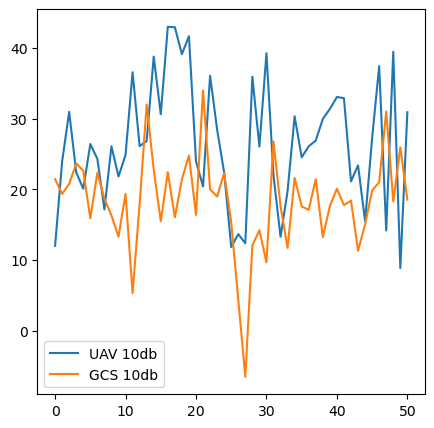

In [28]:
print(np.mean(np.square(uav_data_csi)), np.mean(np.square(uav_data_csi_10db)))
print(np.mean(np.square(gcs_data_csi)), np.mean(np.square(gcs_data_csi_10db)))
print(np.max(uav_data_csi), np.max(uav_data_csi_10db))
# print(uav_data_csi)
plt.figure(figsize=(5, 5))
# plt.plot(uav_data_csi[50], label='UAV')
plt.plot(uav_data_csi_10db[51], label='UAV 10db')
# plt.plot(gcs_data_csi[50], label='GCS')
plt.plot(gcs_data_csi_10db[51], label='GCS 10db')
plt.legend()
plt.show()

In [29]:
snr_max = max(max(uav_data_snr), max(gcs_data_snr))
snr_min = min(min(uav_data_snr), min(gcs_data_snr))

# uav_data_rssi = (uav_data_rssi - rssi_min) / (rssi_max - rssi_min)
# gcs_data_rssi = (gcs_data_rssi - rssi_min) / (rssi_max - rssi_min)

csi_max = np.max([np.max(uav_data_csi), np.max(gcs_data_csi)])
csi_min = np.min([np.min(uav_data_csi), np.min(gcs_data_csi)])

uav_data_csi = (uav_data_csi - csi_min) / (csi_max - csi_min)
gcs_data_csi = (gcs_data_csi - csi_min) / (csi_max - csi_min)

uav_data_csi_0db = (uav_data_csi_0db - np.min([np.min(uav_data_csi_0db), np.min(gcs_data_csi_0db)])) / (np.max([np.max(uav_data_csi_0db), np.max(gcs_data_csi_0db)]) - np.min([np.min(uav_data_csi_0db), np.min(gcs_data_csi_0db)]))
gcs_data_csi_0db = (gcs_data_csi_0db - np.min([np.min(uav_data_csi_0db), np.min(gcs_data_csi_0db)])) / (np.max([np.max(uav_data_csi_0db), np.max(gcs_data_csi_0db)]) - np.min([np.min(uav_data_csi_0db), np.min(gcs_data_csi_0db)]))

uav_data_csi_5db = (uav_data_csi_5db - np.min([np.min(uav_data_csi_5db), np.min(gcs_data_csi_5db)])) / (np.max([np.max(uav_data_csi_5db), np.max(gcs_data_csi_5db)]) - np.min([np.min(uav_data_csi_5db), np.min(gcs_data_csi_5db)]))
gcs_data_csi_5db = (gcs_data_csi_5db - np.min([np.min(uav_data_csi_5db), np.min(gcs_data_csi_5db)])) / (np.max([np.max(uav_data_csi_5db), np.max(gcs_data_csi_5db)]) - np.min([np.min(uav_data_csi_5db), np.min(gcs_data_csi_5db)]))

uav_data_csi_10db = (uav_data_csi_10db - np.min([np.min(uav_data_csi_10db), np.min(gcs_data_csi_10db)])) / (np.max([np.max(uav_data_csi_10db), np.max(gcs_data_csi_10db)]) - np.min([np.min(uav_data_csi_10db), np.min(gcs_data_csi_10db)]))
gcs_data_csi_10db = (gcs_data_csi_10db - np.min([np.min(uav_data_csi_10db), np.min(gcs_data_csi_10db)])) / (np.max([np.max(uav_data_csi_10db), np.max(gcs_data_csi_10db)]) - np.min([np.min(uav_data_csi_10db), np.min(gcs_data_csi_10db)]))

uav_data_csi_15db = (uav_data_csi_15db - np.min([np.min(uav_data_csi_15db), np.min(gcs_data_csi_15db)])) / (np.max([np.max(uav_data_csi_15db), np.max(gcs_data_csi_15db)]) - np.min([np.min(uav_data_csi_15db), np.min(gcs_data_csi_15db)]))
gcs_data_csi_15db = (gcs_data_csi_15db - np.min([np.min(uav_data_csi_15db), np.min(gcs_data_csi_15db)])) / (np.max([np.max(uav_data_csi_15db), np.max(gcs_data_csi_15db)]) - np.min([np.min(uav_data_csi_15db), np.min(gcs_data_csi_15db)]))

uav_data_csi_20db = (uav_data_csi_20db - np.min([np.min(uav_data_csi_20db), np.min(gcs_data_csi_20db)])) / (np.max([np.max(uav_data_csi_20db), np.max(gcs_data_csi_20db)]) - np.min([np.min(uav_data_csi_20db), np.min(gcs_data_csi_20db)]))
gcs_data_csi_20db = (gcs_data_csi_20db - np.min([np.min(uav_data_csi_20db), np.min(gcs_data_csi_20db)])) / (np.max([np.max(uav_data_csi_20db), np.max(gcs_data_csi_20db)]) - np.min([np.min(uav_data_csi_20db), np.min(gcs_data_csi_20db)]))

uav_data_csi_25db = (uav_data_csi_25db - np.min([np.min(uav_data_csi_25db), np.min(gcs_data_csi_25db)])) / (np.max([np.max(uav_data_csi_25db), np.max(gcs_data_csi_25db)]) - np.min([np.min(uav_data_csi_25db), np.min(gcs_data_csi_25db)]))
gcs_data_csi_25db = (gcs_data_csi_25db - np.min([np.min(uav_data_csi_25db), np.min(gcs_data_csi_25db)])) / (np.max([np.max(uav_data_csi_25db), np.max(gcs_data_csi_25db)]) - np.min([np.min(uav_data_csi_25db), np.min(gcs_data_csi_25db)]))

uav_data_csi_30db = (uav_data_csi_30db - np.min([np.min(uav_data_csi_30db), np.min(gcs_data_csi_30db)])) / (np.max([np.max(uav_data_csi_30db), np.max(gcs_data_csi_30db)]) - np.min([np.min(uav_data_csi_30db), np.min(gcs_data_csi_30db)]))
gcs_data_csi_30db = (gcs_data_csi_30db - np.min([np.min(uav_data_csi_30db), np.min(gcs_data_csi_30db)])) / (np.max([np.max(uav_data_csi_30db), np.max(gcs_data_csi_30db)]) - np.min([np.min(uav_data_csi_30db), np.min(gcs_data_csi_30db)]))

uav_data_csi_35db = (uav_data_csi_35db - np.min([np.min(uav_data_csi_35db), np.min(gcs_data_csi_35db)])) / (np.max([np.max(uav_data_csi_35db), np.max(gcs_data_csi_35db)]) - np.min([np.min(uav_data_csi_35db), np.min(gcs_data_csi_35db)]))
gcs_data_csi_35db = (gcs_data_csi_35db - np.min([np.min(uav_data_csi_35db), np.min(gcs_data_csi_35db)])) / (np.max([np.max(uav_data_csi_35db), np.max(gcs_data_csi_35db)]) - np.min([np.min(uav_data_csi_35db), np.min(gcs_data_csi_35db)]))

uav_data_csi_40db = (uav_data_csi_40db - np.min([np.min(uav_data_csi_40db), np.min(gcs_data_csi_40db)])) / (np.max([np.max(uav_data_csi_40db), np.max(gcs_data_csi_40db)]) - np.min([np.min(uav_data_csi_40db), np.min(gcs_data_csi_40db)]))
gcs_data_csi_40db = (gcs_data_csi_40db - np.min([np.min(uav_data_csi_40db), np.min(gcs_data_csi_40db)])) / (np.max([np.max(uav_data_csi_40db), np.max(gcs_data_csi_40db)]) - np.min([np.min(uav_data_csi_40db), np.min(gcs_data_csi_40db)]))

uav_data_csi_45db = (uav_data_csi_45db - np.min([np.min(uav_data_csi_45db), np.min(gcs_data_csi_45db)])) / (np.max([np.max(uav_data_csi_45db), np.max(gcs_data_csi_45db)]) - np.min([np.min(uav_data_csi_45db), np.min(gcs_data_csi_45db)]))
gcs_data_csi_45db = (gcs_data_csi_45db - np.min([np.min(uav_data_csi_45db), np.min(gcs_data_csi_45db)])) / (np.max([np.max(uav_data_csi_45db), np.max(gcs_data_csi_45db)]) - np.min([np.min(uav_data_csi_45db), np.min(gcs_data_csi_45db)]))

uav_data_csi_50db = (uav_data_csi_50db - np.min([np.min(uav_data_csi_50db), np.min(gcs_data_csi_50db)])) / (np.max([np.max(uav_data_csi_50db), np.max(gcs_data_csi_50db)]) - np.min([np.min(uav_data_csi_50db), np.min(gcs_data_csi_50db)]))
gcs_data_csi_50db = (gcs_data_csi_50db - np.min([np.min(uav_data_csi_50db), np.min(gcs_data_csi_50db)])) / (np.max([np.max(uav_data_csi_50db), np.max(gcs_data_csi_50db)]) - np.min([np.min(uav_data_csi_50db), np.min(gcs_data_csi_50db)]))

speed_max = max(max(uav_data_speed), max(gcs_data_speed))
speed_min = min(min(uav_data_speed), min(gcs_data_speed))

# uav_data_speed = (uav_data_speed - speed_min) / (speed_max - speed_min)
# gcs_data_speed = (gcs_data_speed - speed_min) / (speed_max - speed_min)

# pos_max = np.max([np.max(uav_data_pos), np.max(gcs_data_pos)])
# pos_min = np.min([np.min(uav_data_pos), np.min(gcs_data_pos)])
pos_max = 20
pos_min = -20

uav_data_pos = 2 * (uav_data_pos - pos_min) / (pos_max - pos_min) - 1
gcs_data_pos = 2 * (gcs_data_pos - pos_min) / (pos_max - pos_min) - 1
print(pos_max, pos_min)
print(np.max(uav_data_pos), np.min(uav_data_pos))

# quantization
uav_key = []
gcs_key = []
uav_key_0db = []
gcs_key_0db = []
uav_key_5db = []
gcs_key_5db = []
uav_key_10db = []
gcs_key_10db = []
uav_key_15db = []
gcs_key_15db = []
uav_key_20db = []
gcs_key_20db = []
uav_key_25db = []
gcs_key_25db = []
uav_key_30db = []
gcs_key_30db = []
uav_key_35db = []
gcs_key_35db = []
uav_key_40db = []
gcs_key_40db = []
uav_key_45db = []
gcs_key_45db = []
uav_key_50db = []
gcs_key_50db = []

for i in range(len(uav_data_csi)):
    u_key = quan.quantization_1(uav_data_csi[i], 2, 13, 0)
    g_key = quan.quantization_1(gcs_data_csi[i], 2, 13, 0)
    u_key_0db = quan.quantization_1(uav_data_csi_0db[i], 2, 13, 0)
    g_key_0db = quan.quantization_1(gcs_data_csi_0db[i], 2, 13, 0)
    u_key_5db = quan.quantization_1(uav_data_csi_5db[i], 2, 13, 0)
    g_key_5db = quan.quantization_1(gcs_data_csi_5db[i], 2, 13, 0)
    u_key_10db = quan.quantization_1(uav_data_csi_10db[i], 2, 13, 0)
    g_key_10db = quan.quantization_1(gcs_data_csi_10db[i], 2, 13, 0)
    u_key_15db = quan.quantization_1(uav_data_csi_15db[i], 2, 13, 0)
    g_key_15db = quan.quantization_1(gcs_data_csi_15db[i], 2, 13, 0)
    u_key_20db = quan.quantization_1(uav_data_csi_20db[i], 2, 13, 0)
    g_key_20db = quan.quantization_1(gcs_data_csi_20db[i], 2, 13, 0)
    u_key_25db = quan.quantization_1(uav_data_csi_25db[i], 2, 13, 0)
    g_key_25db = quan.quantization_1(gcs_data_csi_25db[i], 2, 13, 0)
    u_key_30db = quan.quantization_1(uav_data_csi_30db[i], 2, 13, 0)
    g_key_30db = quan.quantization_1(gcs_data_csi_30db[i], 2, 13, 0)
    u_key_35db = quan.quantization_1(uav_data_csi_35db[i], 2, 13, 0)
    g_key_35db = quan.quantization_1(gcs_data_csi_35db[i], 2, 13, 0)
    u_key_40db = quan.quantization_1(uav_data_csi_40db[i], 2, 13, 0)
    g_key_40db = quan.quantization_1(gcs_data_csi_40db[i], 2, 13, 0)
    u_key_45db = quan.quantization_1(uav_data_csi_45db[i], 2, 13, 0)
    g_key_45db = quan.quantization_1(gcs_data_csi_45db[i], 2, 13, 0)
    u_key_50db = quan.quantization_1(uav_data_csi_50db[i], 2, 13, 0)
    g_key_50db = quan.quantization_1(gcs_data_csi_50db[i], 2, 13, 0)
    uav_key.append([int(u_key[j]) for j in range(len(u_key))])
    gcs_key.append([int(g_key[j]) for j in range(len(g_key))])
    uav_key_0db.append([int(u_key_0db[j]) for j in range(len(u_key_0db))])
    gcs_key_0db.append([int(g_key_0db[j]) for j in range(len(g_key_0db))])
    uav_key_5db.append([int(u_key_5db[j]) for j in range(len(u_key_5db))])
    gcs_key_5db.append([int(g_key_5db[j]) for j in range(len(g_key_5db))])
    uav_key_10db.append([int(u_key_10db[j]) for j in range(len(u_key_10db))])
    gcs_key_10db.append([int(g_key_10db[j]) for j in range(len(g_key_10db))])
    uav_key_15db.append([int(u_key_15db[j]) for j in range(len(u_key_15db))])
    gcs_key_15db.append([int(g_key_15db[j]) for j in range(len(g_key_15db))])
    uav_key_20db.append([int(u_key_20db[j]) for j in range(len(u_key_20db))])
    gcs_key_20db.append([int(g_key_20db[j]) for j in range(len(g_key_20db))])
    uav_key_25db.append([int(u_key_25db[j]) for j in range(len(u_key_25db))])
    gcs_key_25db.append([int(g_key_25db[j]) for j in range(len(g_key_25db))])
    uav_key_30db.append([int(u_key_30db[j]) for j in range(len(u_key_30db))])
    gcs_key_30db.append([int(g_key_30db[j]) for j in range(len(g_key_30db))])
    uav_key_35db.append([int(u_key_35db[j]) for j in range(len(u_key_35db))])
    gcs_key_35db.append([int(g_key_35db[j]) for j in range(len(g_key_35db))])
    uav_key_40db.append([int(u_key_40db[j]) for j in range(len(u_key_40db))])
    gcs_key_40db.append([int(g_key_40db[j]) for j in range(len(g_key_40db))])
    uav_key_45db.append([int(u_key_45db[j]) for j in range(len(u_key_45db))])
    gcs_key_45db.append([int(g_key_45db[j]) for j in range(len(g_key_45db))])
    uav_key_50db.append([int(u_key_50db[j]) for j in range(len(u_key_50db))])
    gcs_key_50db.append([int(g_key_50db[j]) for j in range(len(g_key_50db))])

uav_data = np.concatenate((uav_data_snr, uav_data_csi, uav_data_speed, uav_data_pos), axis=1)
gcs_data = np.concatenate((gcs_data_snr, gcs_data_csi, gcs_data_speed, gcs_data_pos), axis=1)

uav_data_0db = np.concatenate((uav_data_snr, uav_data_csi_0db, uav_data_speed, uav_data_pos), axis=1)
gcs_data_0db = np.concatenate((gcs_data_snr, gcs_data_csi_0db, gcs_data_speed, gcs_data_pos), axis=1)
uav_data_5db = np.concatenate((uav_data_snr, uav_data_csi_5db, uav_data_speed, uav_data_pos), axis=1)
gcs_data_5db = np.concatenate((gcs_data_snr, gcs_data_csi_5db, gcs_data_speed, gcs_data_pos), axis=1)
uav_data_10db = np.concatenate((uav_data_snr, uav_data_csi_10db, uav_data_speed, uav_data_pos), axis=1)
gcs_data_10db = np.concatenate((gcs_data_snr, gcs_data_csi_10db, gcs_data_speed, gcs_data_pos), axis=1)
uav_data_15db = np.concatenate((uav_data_snr, uav_data_csi_15db, uav_data_speed, uav_data_pos), axis=1)
gcs_data_15db = np.concatenate((gcs_data_snr, gcs_data_csi_15db, gcs_data_speed, gcs_data_pos), axis=1)
uav_data_20db = np.concatenate((uav_data_snr, uav_data_csi_20db, uav_data_speed, uav_data_pos), axis=1)
gcs_data_20db = np.concatenate((gcs_data_snr, gcs_data_csi_20db, gcs_data_speed, gcs_data_pos), axis=1)
uav_data_25db = np.concatenate((uav_data_snr, uav_data_csi_25db, uav_data_speed, uav_data_pos), axis=1)
gcs_data_25db = np.concatenate((gcs_data_snr, gcs_data_csi_25db, gcs_data_speed, gcs_data_pos), axis=1)
uav_data_30db = np.concatenate((uav_data_snr, uav_data_csi_30db, uav_data_speed, uav_data_pos), axis=1)
gcs_data_30db = np.concatenate((gcs_data_snr, gcs_data_csi_30db, gcs_data_speed, gcs_data_pos), axis=1)
uav_data_35db = np.concatenate((uav_data_snr, uav_data_csi_35db, uav_data_speed, uav_data_pos), axis=1)
gcs_data_35db = np.concatenate((gcs_data_snr, gcs_data_csi_35db, gcs_data_speed, gcs_data_pos), axis=1)
uav_data_40db = np.concatenate((uav_data_snr, uav_data_csi_40db, uav_data_speed, uav_data_pos), axis=1)
gcs_data_40db = np.concatenate((gcs_data_snr, gcs_data_csi_40db, gcs_data_speed, gcs_data_pos), axis=1)
uav_data_45db = np.concatenate((uav_data_snr, uav_data_csi_45db, uav_data_speed, uav_data_pos), axis=1)
gcs_data_45db = np.concatenate((gcs_data_snr, gcs_data_csi_45db, gcs_data_speed, gcs_data_pos), axis=1)
uav_data_50db = np.concatenate((uav_data_snr, uav_data_csi_50db, uav_data_speed, uav_data_pos), axis=1)
gcs_data_50db = np.concatenate((gcs_data_snr, gcs_data_csi_50db, gcs_data_speed, gcs_data_pos), axis=1)

uav_data_quan = np.concatenate((uav_data_snr, uav_key, uav_data_speed, uav_data_pos), axis=1)
gcs_data_quan = np.concatenate((gcs_data_snr, gcs_key, gcs_data_speed, gcs_data_pos), axis=1)

uav_data_quan_0db = np.concatenate((uav_data_snr, uav_key_0db, uav_data_speed, uav_data_pos), axis=1)
gcs_data_quan_0db = np.concatenate((gcs_data_snr, gcs_key_0db, gcs_data_speed, gcs_data_pos), axis=1)
uav_data_quan_5db = np.concatenate((uav_data_snr, uav_key_5db, uav_data_speed, uav_data_pos), axis=1)
gcs_data_quan_5db = np.concatenate((gcs_data_snr, gcs_key_5db, gcs_data_speed, gcs_data_pos), axis=1)
uav_data_quan_10db = np.concatenate((uav_data_snr, uav_key_10db, uav_data_speed, uav_data_pos), axis=1)
gcs_data_quan_10db = np.concatenate((gcs_data_snr, gcs_key_10db, gcs_data_speed, gcs_data_pos), axis=1)
uav_data_quan_15db = np.concatenate((uav_data_snr, uav_key_15db, uav_data_speed, uav_data_pos), axis=1)
gcs_data_quan_15db = np.concatenate((gcs_data_snr, gcs_key_15db, gcs_data_speed, gcs_data_pos), axis=1)
uav_data_quan_20db = np.concatenate((uav_data_snr, uav_key_20db, uav_data_speed, uav_data_pos), axis=1)
gcs_data_quan_20db = np.concatenate((gcs_data_snr, gcs_key_20db, gcs_data_speed, gcs_data_pos), axis=1)
uav_data_quan_25db = np.concatenate((uav_data_snr, uav_key_25db, uav_data_speed, uav_data_pos), axis=1)
gcs_data_quan_25db = np.concatenate((gcs_data_snr, gcs_key_25db, gcs_data_speed, gcs_data_pos), axis=1)
uav_data_quan_30db = np.concatenate((uav_data_snr, uav_key_30db, uav_data_speed, uav_data_pos), axis=1)
gcs_data_quan_30db = np.concatenate((gcs_data_snr, gcs_key_30db, gcs_data_speed, gcs_data_pos), axis=1)
uav_data_quan_35db = np.concatenate((uav_data_snr, uav_key_35db, uav_data_speed, uav_data_pos), axis=1)
gcs_data_quan_35db = np.concatenate((gcs_data_snr, gcs_key_35db, gcs_data_speed, gcs_data_pos), axis=1)
uav_data_quan_40db = np.concatenate((uav_data_snr, uav_key_40db, uav_data_speed, uav_data_pos), axis=1)
gcs_data_quan_40db = np.concatenate((gcs_data_snr, gcs_key_40db, gcs_data_speed, gcs_data_pos), axis=1)
uav_data_quan_45db = np.concatenate((uav_data_snr, uav_key_45db, uav_data_speed, uav_data_pos), axis=1)
gcs_data_quan_45db = np.concatenate((gcs_data_snr, gcs_key_45db, gcs_data_speed, gcs_data_pos), axis=1)
uav_data_quan_50db = np.concatenate((uav_data_snr, uav_key_50db, uav_data_speed, uav_data_pos), axis=1)
gcs_data_quan_50db = np.concatenate((gcs_data_snr, gcs_key_50db, gcs_data_speed, gcs_data_pos), axis=1)

normalized_data = np.array([uav_data,gcs_data])
normalized_data_0db = np.array([uav_data_0db,gcs_data_0db])
normalized_data_5db = np.array([uav_data_5db,gcs_data_5db])
normalized_data_10db = np.array([uav_data_10db,gcs_data_10db])
normalized_data_15db = np.array([uav_data_15db,gcs_data_15db])
normalized_data_20db = np.array([uav_data_20db,gcs_data_20db])
normalized_data_25db = np.array([uav_data_25db,gcs_data_25db])
normalized_data_30db = np.array([uav_data_30db,gcs_data_30db])
normalized_data_35db = np.array([uav_data_35db,gcs_data_35db])
normalized_data_40db = np.array([uav_data_40db,gcs_data_40db])
normalized_data_45db = np.array([uav_data_45db,gcs_data_45db])
normalized_data_50db = np.array([uav_data_50db,gcs_data_50db])

normalized_data_quan = np.array([uav_data_quan,gcs_data_quan])
normalized_data_quan_0db = np.array([uav_data_quan_0db,gcs_data_quan_0db])
normalized_data_quan_5db = np.array([uav_data_quan_5db,gcs_data_quan_5db])
normalized_data_quan_10db = np.array([uav_data_quan_10db,gcs_data_quan_10db])
normalized_data_quan_15db = np.array([uav_data_quan_15db,gcs_data_quan_15db])
normalized_data_quan_20db = np.array([uav_data_quan_20db,gcs_data_quan_20db])
normalized_data_quan_25db = np.array([uav_data_quan_25db,gcs_data_quan_25db])
normalized_data_quan_30db = np.array([uav_data_quan_30db,gcs_data_quan_30db])
normalized_data_quan_35db = np.array([uav_data_quan_35db,gcs_data_quan_35db])
normalized_data_quan_40db = np.array([uav_data_quan_40db,gcs_data_quan_40db])
normalized_data_quan_45db = np.array([uav_data_quan_45db,gcs_data_quan_45db])
normalized_data_quan_50db = np.array([uav_data_quan_50db,gcs_data_quan_50db])

print(np.shape(normalized_data))
print(np.shape(normalized_data_quan))
print(np.shape(normalized_data_0db))
print(np.shape(normalized_data_quan_0db))

20 -20
0.9831303368770272 -1.1465249597916203
(2, 10259, 65)
(2, 10259, 116)
(2, 10259, 65)
(2, 10259, 116)


In [30]:
print(csi_min, csi_max)

0.0 61.84658438426491


In [44]:
training_size = int(len(normalized_data[0]) * 0.8)
testing_size = int(len(normalized_data[0]) * 0.2)

training_set = normalized_data[:, :training_size]
testing_set = normalized_data[:, training_size:]
# validation_set = normalized_data[:, training_size + testing_size:]
training_set_0db = normalized_data_0db[:, :training_size]
testing_set_0db = normalized_data_0db[:, training_size:]
training_set_5db = normalized_data_5db[:, :training_size]
testing_set_5db = normalized_data_5db[:, training_size:]
training_set_10db = normalized_data_10db[:, :training_size]
testing_set_10db = normalized_data_10db[:, training_size:]
training_set_15db = normalized_data_15db[:, :training_size]
testing_set_15db = normalized_data_15db[:, training_size:]
training_set_20db = normalized_data_20db[:, :training_size]
testing_set_20db = normalized_data_20db[:, training_size:]
training_set_25db = normalized_data_25db[:, :training_size]
testing_set_25db = normalized_data_25db[:, training_size:]
training_set_30db = normalized_data_30db[:, :training_size]
testing_set_30db = normalized_data_30db[:, training_size:]
training_set_35db = normalized_data_35db[:, :training_size]
testing_set_35db = normalized_data_35db[:, training_size:]
training_set_40db = normalized_data_40db[:, :training_size]
testing_set_40db = normalized_data_40db[:, training_size:]
training_set_45db = normalized_data_45db[:, :training_size]
testing_set_45db = normalized_data_45db[:, training_size:]
training_set_50db = normalized_data_50db[:, :training_size]
testing_set_50db = normalized_data_50db[:, training_size:]

training_set_quan = normalized_data_quan[:, :training_size]
testing_set_quan = normalized_data_quan[:, training_size:]
training_set_quan_0db = normalized_data_quan_0db[:, :training_size]
testing_set_quan_0db = normalized_data_quan_0db[:, training_size:]
training_set_quan_5db = normalized_data_quan_5db[:, :training_size]
testing_set_quan_5db = normalized_data_quan_5db[:, training_size:]
training_set_quan_10db = normalized_data_quan_10db[:, :training_size]
testing_set_quan_10db = normalized_data_quan_10db[:, training_size:]
training_set_quan_15db = normalized_data_quan_15db[:, :training_size]
testing_set_quan_15db = normalized_data_quan_15db[:, training_size:]
training_set_quan_20db = normalized_data_quan_20db[:, :training_size]
testing_set_quan_20db = normalized_data_quan_20db[:, training_size:]
training_set_quan_25db = normalized_data_quan_25db[:, :training_size]
testing_set_quan_25db = normalized_data_quan_25db[:, training_size:]
training_set_quan_30db = normalized_data_quan_30db[:, :training_size]
testing_set_quan_30db = normalized_data_quan_30db[:, training_size:]
training_set_quan_35db = normalized_data_quan_35db[:, :training_size]
testing_set_quan_35db = normalized_data_quan_35db[:, training_size:]
training_set_quan_40db = normalized_data_quan_40db[:, :training_size]
testing_set_quan_40db = normalized_data_quan_40db[:, training_size:]
training_set_quan_45db = normalized_data_quan_45db[:, :training_size]
testing_set_quan_45db = normalized_data_quan_45db[:, training_size:]
training_set_quan_50db = normalized_data_quan_50db[:, :training_size]
testing_set_quan_50db = normalized_data_quan_50db[:, training_size:]

training_set_all = np.concatenate((training_set, training_set_0db, training_set_10db, training_set_20db, training_set_30db, training_set_40db, training_set_50db), axis=1)
testing_set_all = np.concatenate((testing_set, testing_set_0db, testing_set_10db, testing_set_20db, testing_set_30db, testing_set_40db, testing_set_50db), axis=1)

training_set_quan_all = np.concatenate((training_set_quan, training_set_quan_0db, training_set_quan_10db, training_set_quan_20db, training_set_quan_30db, training_set_quan_40db, training_set_quan_50db), axis=1)
testing_set_quan_all = np.concatenate((testing_set_quan, testing_set_quan_0db, testing_set_quan_10db, testing_set_quan_20db, testing_set_quan_30db, testing_set_quan_40db, testing_set_quan_50db), axis=1)

index_list = list(range(len(normalized_data[0])))
random.shuffle(index_list)

uav_data_shuffled = [uav_data[i] for i in index_list]
gcs_data_shuffled = [gcs_data[i] for i in index_list]

shuffled_data = np.array([uav_data_shuffled, gcs_data_shuffled])

# training_set_shuffled = shuffled_data[:, :training_size]
# testing_set_shuffled = shuffled_data[:, training_size:]
# validation_set_shuffled = shuffled_data[:, training_size + testing_size:]

np.save("test_set_4/normalized_speed_training_set", training_set)
np.save("test_set_4/normalized_speed_testing_set", testing_set)
# np.save("test_set_4/quantified_speed_validation_set", validation_set)
np.save("test_set_4/normalized_speed_training_set_0db", training_set_0db)
np.save("test_set_4/normalized_speed_testing_set_0db", testing_set_0db)
np.save("test_set_4/normalized_speed_training_set_5db", training_set_5db)
np.save("test_set_4/normalized_speed_testing_set_5db", testing_set_5db)
np.save("test_set_4/normalized_speed_training_set_10db", training_set_10db)
np.save("test_set_4/normalized_speed_testing_set_10db", testing_set_10db)
np.save("test_set_4/normalized_speed_training_set_15db", training_set_15db)
np.save("test_set_4/normalized_speed_testing_set_15db", testing_set_15db)
np.save("test_set_4/normalized_speed_training_set_20db", training_set_20db)
np.save("test_set_4/normalized_speed_testing_set_20db", testing_set_20db)
np.save("test_set_4/normalized_speed_training_set_25db", training_set_25db)
np.save("test_set_4/normalized_speed_testing_set_25db", testing_set_25db)
np.save("test_set_4/normalized_speed_training_set_30db", training_set_30db)
np.save("test_set_4/normalized_speed_testing_set_30db", testing_set_30db)
np.save("test_set_4/normalized_speed_training_set_35db", training_set_35db)
np.save("test_set_4/normalized_speed_testing_set_35db", testing_set_35db)
np.save("test_set_4/normalized_speed_training_set_40db", training_set_40db)
np.save("test_set_4/normalized_speed_testing_set_40db", testing_set_40db)
np.save("test_set_4/normalized_speed_training_set_45db", training_set_45db)
np.save("test_set_4/normalized_speed_testing_set_45db", testing_set_45db)
np.save("test_set_4/normalized_speed_training_set_50db", training_set_50db)
np.save("test_set_4/normalized_speed_testing_set_50db", testing_set_50db)
np.save("test_set_4/normalized_speed_training_set_all", training_set_all)
np.save("test_set_4/normalized_speed_testing_set_all", testing_set_all)

np.save("test_set_4/quantified_speed_training_set", training_set_quan)
np.save("test_set_4/quantified_speed_testing_set", testing_set_quan)
np.save("test_set_4/quantified_speed_training_set_0db", training_set_quan_0db)
np.save("test_set_4/quantified_speed_testing_set_0db", testing_set_quan_0db)
np.save("test_set_4/quantified_speed_training_set_5db", training_set_quan_5db)
np.save("test_set_4/quantified_speed_testing_set_5db", testing_set_quan_5db)
np.save("test_set_4/quantified_speed_training_set_10db", training_set_quan_10db)
np.save("test_set_4/quantified_speed_testing_set_10db", testing_set_quan_10db)
np.save("test_set_4/quantified_speed_training_set_15db", training_set_quan_15db)
np.save("test_set_4/quantified_speed_testing_set_15db", testing_set_quan_15db)
np.save("test_set_4/quantified_speed_training_set_20db", training_set_quan_20db)
np.save("test_set_4/quantified_speed_testing_set_20db", testing_set_quan_20db)
np.save("test_set_4/quantified_speed_training_set_25db", training_set_quan_25db)
np.save("test_set_4/quantified_speed_testing_set_25db", testing_set_quan_25db)
np.save("test_set_4/quantified_speed_training_set_30db", training_set_quan_30db)
np.save("test_set_4/quantified_speed_testing_set_30db", testing_set_quan_30db)
np.save("test_set_4/quantified_speed_training_set_35db", training_set_quan_35db)
np.save("test_set_4/quantified_speed_testing_set_35db", testing_set_quan_35db)
np.save("test_set_4/quantified_speed_training_set_40db", training_set_quan_40db)
np.save("test_set_4/quantified_speed_testing_set_40db", testing_set_quan_40db)
np.save("test_set_4/quantified_speed_training_set_45db", training_set_quan_45db)
np.save("test_set_4/quantified_speed_testing_set_45db", testing_set_quan_45db)
np.save("test_set_4/quantified_speed_training_set_50db", training_set_quan_50db)
np.save("test_set_4/quantified_speed_testing_set_50db", testing_set_quan_50db)
np.save("test_set_4/quantified_speed_training_set_all", training_set_quan_all)
np.save("test_set_4/quantified_speed_testing_set_all", testing_set_quan_all)
# np.save("test_set_4/quantified_speed_training_set_shuffled", training_set_shuffled)
# np.save("test_set_4/quantified_speed_testing_set_shuffled", testing_set_shuffled)
# np.save("test_set_4/quantified_speed_validation_set_shuffled", validation_set_shuffled)

print(np.shape(training_set))
print(np.shape(testing_set))
# print(np.shape(validation_set))
# print(np.shape(training_set_shuffled))
# print(np.shape(testing_set_shuffled))
# print(np.shape(validation_set_shuffled))

(2, 8207, 65)
(2, 2052, 65)


In [32]:
# shuffle the data

# uav_data = [uav_data[i] for i in index_list]
# gcs_data = [gcs_data[i] for i in index_list]

# fullset_shuffle = np.array([uav_data,gcs_data])
# print(np.shape(fullset_shuffle))

In [33]:
#80 percent training, 10 percent testing and 10 percent validation
training_size = int(0.8 * len(fullset_shuffle[0]))
testing_size = int(0.1 * len(fullset_shuffle[0]))

#normalize training set
# training_size
uavdata_training = fullset_shuffle[0,-training_size:,1:52]
inmax = np.max(uavdata_training)
inmin = np.min(uavdata_training)
uavdata_training = (uavdata_training - inmin) / (inmax - inmin)

iotdata_training = fullset_shuffle[1,-training_size:,1:52]
outmax = np.max(iotdata_training)
outmin = np.min(iotdata_training)
iotdata_training = (iotdata_training - outmin) / (outmax - outmin)

#training set without rssi
print(np.shape(np.array([uavdata_training,iotdata_training])))
#np.save("without_rssi_normalized_csi_training_set",np.array([uavdata,iotdata]))


#normalize testing set
# training_size
uavdata_testing = fullset_shuffle[0,:testing_size,1:52]
uavdata_testing = (uavdata_testing - inmin) / (inmax - inmin)

iotdata_testing = fullset_shuffle[1,:testing_size,1:52]
iotdata_testing = (iotdata_testing - outmin) / (outmax - outmin)

#testing set without rssi
print(np.shape(np.array([uavdata_testing,iotdata_testing])))
#np.save("without_rssi_normalized_csi_testing_set",np.array([uavdata_t,iotdata_t]))

#normalize validation set
# training_size
uavdata_validation = fullset_shuffle[0,testing_size:2*testing_size,1:52]
uavdata_validation = (uavdata_validation - inmin) / (inmax - inmin)

iotdata_validation = fullset_shuffle[1,testing_size:2*testing_size,1:52]
iotdata_validation = (iotdata_validation - outmin) / (outmax - outmin)

#validation set without rssi
print(np.shape(np.array([uavdata_validation,iotdata_validation])))

print(inmax,inmin,outmax,outmin)

NameError: name 'fullset_shuffle' is not defined

In [82]:
# normalized with RSSI & speed

# training set
# with rssi
uavdata_rssi = fullset_shuffle[0,-training_size:,0:1]
inmax_rssi = np.max(uavdata_rssi)
inmin_rssi = np.min(uavdata_rssi)
uavdata_rssi = (uavdata_rssi - inmin_rssi) / (inmax_rssi - inmin_rssi)

iotdata_rssi = fullset_shuffle[1,-training_size:,0:1]
outmax_rssi = np.max(iotdata_rssi)
outmin_rssi = np.min(iotdata_rssi)
iotdata_rssi = (iotdata_rssi - outmin_rssi) / (outmax_rssi - outmin_rssi)

print("inmax_rssi:",inmax_rssi)
print("inmin_rssi:",inmin_rssi)
print("outmax_rssi:",outmax_rssi)
print("outmin_rssi:",outmin_rssi)

# append rssi
uav_with_rssi_training = np.append(uavdata_rssi,uavdata_training,axis=1)
iot_with_rssi_training = np.append(iotdata_rssi,iotdata_training,axis=1)
print(np.shape(np.array([uav_with_rssi_training,iot_with_rssi_training])))
# np.save("test_set_4/normalized_speed_training_set", np.array([uav_with_rssi_training,iot_with_rssi_training]))

#normalized with RSSI

# testing set
# with rssi
uavdata_rssi_t = fullset_shuffle[0,:testing_size,0:1]
uavdata_rssi_t = (uavdata_rssi_t - inmin_rssi) / (inmax_rssi - inmin_rssi)

iotdata_rssi_t = fullset_shuffle[1,:testing_size,0:1]
iotdata_rssi_t = (iotdata_rssi_t - outmin_rssi) / (outmax_rssi - outmin_rssi)

#append rssi and speed
uav_with_rssi_testing = np.append(uavdata_rssi_t,uavdata_testing,axis=1)
iot_with_rssi_testing = np.append(iotdata_rssi_t,iotdata_testing,axis=1)
# print(uav_with_rssi_testing[0])
print(np.shape(np.array([uav_with_rssi_testing,iot_with_rssi_testing])))
# np.save("test_set_4/normalized_speed_testing_set",np.array([uav_with_rssi_testing,iot_with_rssi_testing]))

# validation set
# with rssi
uavdata_rssi_v = fullset_shuffle[0,testing_size:2*testing_size,0:1]
uavdata_rssi_v = (uavdata_rssi_v - inmin_rssi) / (inmax_rssi - inmin_rssi)

iotdata_rssi_v = fullset_shuffle[1,testing_size:2*testing_size,0:1]
iotdata_rssi_v = (iotdata_rssi_v - outmin_rssi) / (outmax_rssi - outmin_rssi)

#append rssi and speed
uav_with_rssi_validation = np.append(uavdata_rssi_v,uavdata_validation,axis=1)
iot_with_rssi_validation = np.append(iotdata_rssi_v,iotdata_validation,axis=1)

print(np.shape(np.array([uav_with_rssi_validation,iot_with_rssi_validation])))

inmax_rssi: 74.0
inmin_rssi: 22.0
outmax_rssi: 63.0
outmin_rssi: 14.0
(2, 8207, 52)
(2, 1025, 52)
(2, 1025, 52)


In [83]:
# training set with speed
uav_speed = fullset_shuffle[0,-training_size:,52:53]
iot_speed = fullset_shuffle[1,-training_size:,52:53]
# uav_speed_label = fullset_label[0,:training_size,52:53]
# iot_speed_label = fullset_label[1,:training_size,52:53]

max_speed = np.max(uav_speed)
min_speed = np.min(uav_speed)
uav_speed = (uav_speed - min_speed) / (max_speed - min_speed)
iot_speed = (iot_speed - min_speed) / (max_speed - min_speed)
print("max_speed:",max_speed)
print("min_speed:",min_speed)

# append speed
uav_with_speed_training = np.append(uav_with_rssi_training,uav_speed,axis=1)
iot_with_speed_training = np.append(iot_with_rssi_training,iot_speed,axis=1)
speed_training_set = np.array([uav_with_speed_training,iot_with_speed_training])
print(np.shape(speed_training_set))
np.save("test_set_4/normalized_speed_training_set", speed_training_set)

# uav_with_speed_label_training = np.append(uav_with_rssi_training,uav_speed_label,axis=1)
# iot_with_speed_label_training = np.append(iot_with_rssi_training,iot_speed_label,axis=1)
# print(np.shape(np.array([uav_with_speed_label_training,iot_with_speed_label_training])))
# np.save("test_set_4/normalized_speed_label_training_set",np.array([uav_with_speed_label_training,iot_with_speed_label_training]))

# testing set with speed
uav_speed_t = fullset_shuffle[0,:testing_size,52:53]
iot_speed_t = fullset_shuffle[1,:testing_size,52:53]
# uav_speed_label_t = fullset_label[0,training_size:,52:53]
# iot_speed_label_t = fullset_label[1,training_size:,52:53]

uav_speed_t = (uav_speed_t - min_speed) / (max_speed - min_speed)
iot_speed_t = (iot_speed_t - min_speed) / (max_speed - min_speed)

# append speed
uav_with_speed_testing = np.append(uav_with_rssi_testing,uav_speed_t,axis=1)
iot_with_speed_testing = np.append(iot_with_rssi_testing,iot_speed_t,axis=1)
speed_testing_set = np.array([uav_with_speed_testing,iot_with_speed_testing])
print(np.shape(speed_testing_set))
np.save("test_set_4/normalized_speed_testing_set",speed_testing_set)

# uav_with_speed_label_testing = np.append(uav_with_rssi_testing,uav_speed_label_t,axis=1)
# iot_with_speed_label_testing = np.append(iot_with_rssi_testing,iot_speed_label_t,axis=1)
# speed_label_testing_set = np.array([uav_with_speed_label_testing,iot_with_speed_label_testing])
# print(np.shape(speed_label_testing_set))
# np.save("test_set_4/normalized_speed_label_testing_set",speed_label_testing_set)

# validation set with speed
uav_speed_v = fullset_shuffle[0,testing_size:2*testing_size:,52:53]
iot_speed_v = fullset_shuffle[1,testing_size:2*testing_size:,52:53]

uav_speed_v = (uav_speed_v - min_speed) / (max_speed - min_speed)
iot_speed_v = (iot_speed_v - min_speed) / (max_speed - min_speed)

# append speed
uav_with_speed_validation = np.append(uav_with_rssi_validation,uav_speed_v,axis=1)
iot_with_speed_validation = np.append(iot_with_rssi_validation,iot_speed_v,axis=1)
speed_validation_set = np.array([uav_with_speed_validation,iot_with_speed_validation])
print(np.shape(speed_validation_set))
np.save("test_set_4/normalized_speed_validation_set",speed_validation_set)


max_speed: 7.266147534973399
min_speed: 0.0
(2, 8207, 53)
(2, 1025, 53)
(2, 1025, 53)


In [84]:
print(speed_testing_set[0][0])

[0.69230769 0.36871088 0.36871088 0.35901099 0.35901099 0.34978985
 0.34108631 0.33294095 0.34716405 0.33993463 0.34829182 0.34829182
 0.34829182 0.36335402 0.36335402 0.36335402 0.34829182 0.35461477
 0.35461477 0.33993463 0.32539569 0.31101773 0.29682415 0.29682415
 0.30507687 0.30507687 0.331761   0.331761   0.35608621 0.35901099
 0.36335402 0.39107694 0.39770584 0.39074255 0.38433373 0.39934587
 0.40904799 0.40422604 0.38433373 0.36871088 0.3531372  0.3376195
 0.32739814 0.31849318 0.32539569 0.33294095 0.31890335 0.313946
 0.31059715 0.32094631 0.331761   0.35461477 0.00802482]


### Standardize set

In [85]:
# using standardization instead of normalization
# training set
uavdata_training = fullset_shuffle[0,:training_size,1:52]
inmean = np.mean(uavdata_training)
instd = np.std(uavdata_training)
uavdata_training = (uavdata_training - inmean) / instd

iotdata_training = fullset_shuffle[1,:training_size,1:52]
outmean = np.mean(iotdata_training)
outstd = np.std(iotdata_training)
iotdata_training = (iotdata_training - outmean) / outstd

#training set without rssi
print(np.shape(np.array([uavdata_training,iotdata_training])))

# testing set
uavdata_testing = fullset_shuffle[0,training_size:training_size+testing_size,1:52]
uavdata_testing = (uavdata_testing - inmean) / instd

iotdata_testing = fullset_shuffle[1,training_size:training_size+testing_size,1:52]
iotdata_testing = (iotdata_testing - outmean) / outstd

#testing set without rssi
print(np.shape(np.array([uavdata_testing,iotdata_testing])))

# validation set
uavdata_validation = fullset_shuffle[0,training_size+testing_size:,1:52]
uavdata_validation = (uavdata_validation - inmean) / instd

iotdata_validation = fullset_shuffle[1,training_size+testing_size:,1:52]
iotdata_validation = (iotdata_validation - outmean) / outstd

#validation set without rssi
print(np.shape(np.array([uavdata_validation,iotdata_validation])))

(2, 8207, 51)
(2, 1025, 51)
(2, 1027, 51)


In [86]:
# standardized with RSSI & speed

# training set
# with rssi
uavdata_rssi = fullset_shuffle[0,:training_size,0:1]
inmean_rssi = np.mean(uavdata_rssi)
instd_rssi = np.std(uavdata_rssi)
uavdata_rssi = (uavdata_rssi - inmean_rssi) / instd_rssi

iotdata_rssi = fullset_shuffle[1,:training_size,0:1]
outmean_rssi = np.mean(iotdata_rssi)
outstd_rssi = np.std(iotdata_rssi)
iotdata_rssi = (iotdata_rssi - outmean_rssi) / outstd_rssi

print("inmean_rssi:",inmean_rssi)
print("instd_rssi:",instd_rssi)
print("outmean_rssi:",outmean_rssi)
print("outstd_rssi:",outstd_rssi)

# append rssi
uav_with_rssi_training = np.append(uavdata_rssi,uavdata_training,axis=1)
iot_with_rssi_training = np.append(iotdata_rssi,iotdata_training,axis=1)
print(np.shape(np.array([uav_with_rssi_training,iot_with_rssi_training])))

#testing set
uavdata_rssi_t = fullset_shuffle[0,training_size:training_size+testing_size,0:1]
uavdata_rssi_t = (uavdata_rssi_t - inmean_rssi) / instd_rssi

iotdata_rssi_t = fullset_shuffle[1,training_size:training_size+testing_size,0:1]
iotdata_rssi_t = (iotdata_rssi_t - outmean_rssi) / outstd_rssi

#append rssi
uav_with_rssi_testing = np.append(uavdata_rssi_t,uavdata_testing,axis=1)
iot_with_rssi_testing = np.append(iotdata_rssi_t,iotdata_testing,axis=1)
print(np.shape(np.array([uav_with_rssi_testing,iot_with_rssi_testing])))

#validation set
uavdata_rssi_v = fullset_shuffle[0,training_size+testing_size:,0:1]
uavdata_rssi_v = (uavdata_rssi_v - inmean_rssi) / instd_rssi

iotdata_rssi_v = fullset_shuffle[1,training_size+testing_size:,0:1]
iotdata_rssi_v = (iotdata_rssi_v - outmean_rssi) / outstd_rssi

#append rssi
uav_with_rssi_validation = np.append(uavdata_rssi_v,uavdata_validation,axis=1)
iot_with_rssi_validation = np.append(iotdata_rssi_v,iotdata_validation,axis=1)
print(np.shape(np.array([uav_with_rssi_validation,iot_with_rssi_validation])))

inmean_rssi: 59.65931521871573
instd_rssi: 6.653255069205194
outmean_rssi: 41.35932740343609
outstd_rssi: 6.496621081320801
(2, 8207, 52)
(2, 1025, 52)
(2, 1027, 52)


In [87]:
# training set with speed
uav_speed = fullset_shuffle[0,:training_size,52:53]
inmean_speed = np.mean(uav_speed)
instd_speed = np.std(uav_speed)
uav_speed = (uav_speed - inmean_speed) / instd_speed

iot_speed = fullset_shuffle[1,:training_size,52:53]
outmean_speed = np.mean(iot_speed)
outstd_speed = np.std(iot_speed)
iot_speed = (iot_speed - outmean_speed) / outstd_speed

# append speed
uav_with_speed_training = np.append(uav_with_rssi_training,uav_speed,axis=1)
iot_with_speed_training = np.append(iot_with_rssi_training,iot_speed,axis=1)
print(np.shape(np.array([uav_with_speed_training,iot_with_speed_training])))
np.save("test_set_4/standardized_speed_training_set",np.array([uav_with_speed_training,iot_with_speed_training]))

# testing set with speed
uav_speed_t = fullset_shuffle[0,training_size:training_size+testing_size,52:53]
uav_speed_t = (uav_speed_t - inmean_speed) / instd_speed

iot_speed_t = fullset_shuffle[1,training_size:training_size+testing_size,52:53]
iot_speed_t = (iot_speed_t - outmean_speed) / outstd_speed

# append speed
uav_with_speed_testing = np.append(uav_with_rssi_testing,uav_speed_t,axis=1)
iot_with_speed_testing = np.append(iot_with_rssi_testing,iot_speed_t,axis=1)
print(np.shape(np.array([uav_with_speed_testing,iot_with_speed_testing])))
np.save("test_set_4/standardized_speed_testing_set",np.array([uav_with_speed_testing,iot_with_speed_testing]))

# validation set with speed
uav_speed_v = fullset_shuffle[0,training_size+testing_size:,52:53]
uav_speed_v = (uav_speed_v - inmean_speed) / instd_speed

iot_speed_v = fullset_shuffle[1,training_size+testing_size:,52:53]
iot_speed_v = (iot_speed_v - outmean_speed) / outstd_speed

# append speed
uav_with_speed_validation = np.append(uav_with_rssi_validation,uav_speed_v,axis=1)
iot_with_speed_validation = np.append(iot_with_rssi_validation,iot_speed_v,axis=1)
print(np.shape(np.array([uav_with_speed_validation,iot_with_speed_validation])))
np.save("test_set_4/standardized_speed_validation_set",np.array([uav_with_speed_validation,iot_with_speed_validation]))



(2, 8207, 53)
(2, 1025, 53)
(2, 1027, 53)


In [88]:
std_training_set = np.load("test_set_4/standardized_speed_training_set.npy")

print(std_training_set[0][0])

[-0.24939901  0.34773011  0.34773011  0.18569423  0.18569423  0.03165595
 -0.11373604 -0.24980363 -0.01220791 -0.13297464  0.00663138  0.00663138
  0.00663138  0.25824422  0.25824422  0.25824422  0.00663138  0.11225576
  0.11225576 -0.13297464 -0.37584654 -0.61602916 -0.85313168 -0.85313168
 -0.7152707  -0.7152707  -0.26951456 -0.26951456  0.13683599  0.18569423
  0.25824422  0.72135334  0.83208848  0.71576727  0.60870856  0.85948506
  1.02155822  0.94100791  0.60870856  0.34773011  0.08757311 -0.17164873
 -0.34239572 -0.49115226 -0.37584654 -0.24980363 -0.48430048 -0.56711258
 -0.62305489 -0.45017295 -0.26951456  0.11225576 -0.62813585]


### pre-quantization

In [89]:
import greycode_quantization as quan

# quantization
# training set
uavdata_training = speed_training_set[0,:,1:52]
iotdata_training = speed_training_set[1,:,1:52]

uavdata_key = []
iotdata_key = []

for data_in, data_out in zip(uavdata_training, iotdata_training):
    uav_key = []
    iot_key = []
    key_in = quan.quantization_1(data_in, 2, 13, 0)
    key_out = quan.quantization_1(data_out, 2, 13, 0)
    for i in range(len(key_in)):
        uav_key.append(int(key_in[i]))
        iot_key.append(int(key_out[i]))
    uavdata_key.append(uav_key)
    iotdata_key.append(iot_key)

print(np.shape(np.array([uavdata_key,iotdata_key])))

# testing set
uavdata_testing = speed_testing_set[0,:,1:52]
iotdata_testing = speed_testing_set[1,:,1:52]

uavdata_key_t = []
iotdata_key_t = []

for data_in, data_out in zip(uavdata_testing, iotdata_testing):
    uav_key = []
    iot_key = []
    key_in = quan.quantization_1(data_in, 2, 13, 0)
    key_out = quan.quantization_1(data_out, 2, 13, 0)
    for i in range(len(key_in)):
        uav_key.append(int(key_in[i]))
        iot_key.append(int(key_out[i]))
    uavdata_key_t.append(uav_key)
    iotdata_key_t.append(iot_key)

print(np.shape(np.array([uavdata_key_t,iotdata_key_t])))

# validation set
uavdata_validation = speed_validation_set[0,:,1:52]
iotdata_validation = speed_validation_set[1,:,1:52]

uavdata_key_v = []
iotdata_key_v = []

for data_in, data_out in zip(uavdata_validation, iotdata_validation):
    uav_key = []
    iot_key = []
    key_in = quan.quantization_1(data_in, 2, 13, 0)
    key_out = quan.quantization_1(data_out, 2, 13, 0)
    for i in range(len(key_in)):
        uav_key.append(int(key_in[i]))
        iot_key.append(int(key_out[i]))
    uavdata_key_v.append(uav_key)
    iotdata_key_v.append(iot_key)

print(np.shape(np.array([uavdata_key_v,iotdata_key_v])))

(2, 8207, 102)
(2, 1025, 102)
(2, 1025, 102)


In [90]:
# append rssi
uavdata_rssi = speed_training_set[0,:,0:1]
iotdata_rssi = speed_training_set[1,:,0:1]

uavdata_rssi_t = speed_testing_set[0,:,0:1]
iotdata_rssi_t = speed_testing_set[1,:,0:1]

uavdata_rssi_v = speed_validation_set[0,:,0:1]
iotdata_rssi_v = speed_validation_set[1,:,0:1]

uav_with_rssi_training = np.append(uavdata_rssi,uavdata_key,axis=1)
iot_with_rssi_training = np.append(iotdata_rssi,iotdata_key,axis=1)
# print(np.shape(np.array([uav_with_rssi_training,iot_with_rssi_training])))

uav_with_rssi_testing = np.append(uavdata_rssi_t,uavdata_key_t,axis=1)
iot_with_rssi_testing = np.append(iotdata_rssi_t,iotdata_key_t,axis=1)
# print(np.shape(np.array([uav_with_rssi_testing,iot_with_rssi_testing])))

uav_with_rssi_validation = np.append(uavdata_rssi_v,uavdata_key_v,axis=1)
iot_with_rssi_validation = np.append(iotdata_rssi_v,iotdata_key_v,axis=1)

# print(np.shape(np.array([uav_with_rssi_validation,iot_with_rssi_validation])))

# append speed
uav_speed_training = speed_training_set[0,:,52:53]
iot_speed_training = speed_training_set[1,:,52:53]

uav_speed_testing = speed_testing_set[0,:,52:53]
iot_speed_testing = speed_testing_set[1,:,52:53]

uav_speed_validation = speed_validation_set[0,:,52:53]
iot_speed_validation = speed_validation_set[1,:,52:53]

uav_with_speed_training = np.append(uav_with_rssi_training,uav_speed_training,axis=1)
iot_with_speed_training = np.append(iot_with_rssi_training,iot_speed_training,axis=1)

uav_with_speed_testing = np.append(uav_with_rssi_testing,uav_speed_testing,axis=1)
iot_with_speed_testing = np.append(iot_with_rssi_testing,iot_speed_testing,axis=1)

uav_with_speed_validation = np.append(uav_with_rssi_validation,uav_speed_validation,axis=1)
iot_with_speed_validation = np.append(iot_with_rssi_validation,iot_speed_validation,axis=1)

print(np.shape(np.array([uav_with_speed_training,iot_with_speed_training])))
print(np.shape(np.array([uav_with_speed_testing,iot_with_speed_testing])))
print(np.shape(np.array([uav_with_speed_validation,iot_with_speed_validation])))

np.save("test_set_4/quantified_speed_training_set",np.array([uav_with_speed_training,iot_with_speed_training]))
np.save("test_set_4/quantified_speed_testing_set",np.array([uav_with_speed_testing,iot_with_speed_testing]))
np.save("test_set_4/quantified_speed_validation_set",np.array([uav_with_speed_validation,iot_with_speed_validation]))

training = np.array([uav_with_speed_training,iot_with_speed_training])
testing = np.array([uav_with_speed_testing,iot_with_speed_testing])
validation = np.array([uav_with_speed_validation,iot_with_speed_validation])

(2, 8207, 104)
(2, 1025, 104)
(2, 1025, 104)


### split

In [91]:
hover_training = [[],[]]
hover_testing = [[],[]]
hover_validation = [[],[]]
moving_training = [[],[]]
moving_testing = [[],[]]
moving_validation = [[],[]]

for i in range(len(training_set_shuffled[0])):
    if -(training_set_shuffled[0][i][103]* 7.118609414766342 - 7.118609414766342) < 0.15:
        hover_training[0].append(training_set_shuffled[0][i])
        hover_training[1].append(training_set_shuffled[1][i])
    else:
        moving_training[0].append(training_set_shuffled[0][i])
        moving_training[1].append(training_set_shuffled[1][i])

for i in range(len(testing_set_shuffled[0])):
    if -(testing_set_shuffled[0][i][103]* 7.118609414766342 - 7.118609414766342) < 0.15:
        hover_testing[0].append(testing_set_shuffled[0][i])
        hover_testing[1].append(testing_set_shuffled[1][i])
    else:
        moving_testing[0].append(testing_set_shuffled[0][i])
        moving_testing[1].append(testing_set_shuffled[1][i])

for i in range(len(validation_set_shuffled[0])):
    if -(validation_set_shuffled[0][i][103]* 7.118609414766342 - 7.118609414766342) < 0.15:
        hover_validation[0].append(validation_set_shuffled[0][i])
        hover_validation[1].append(validation_set_shuffled[1][i])
    else:
        moving_validation[0].append(validation_set_shuffled[0][i])
        moving_validation[1].append(validation_set_shuffled[1][i])

hover_training = np.array(hover_training)
hover_testing = np.array(hover_testing)
hover_validation = np.array(hover_validation)
moving_training = np.array(moving_training)
moving_testing = np.array(moving_testing)
moving_validation = np.array(moving_validation)

print(np.shape(hover_training))
print(np.shape(moving_training))

np.save("test_set_4/quantified_speed_hover_training_set",hover_training)
np.save("test_set_4/quantified_speed_hover_testing_set",hover_testing)
np.save("test_set_4/quantified_speed_hover_validation_set",hover_validation)
np.save("test_set_4/quantified_speed_moving_training_set",moving_training)
np.save("test_set_4/quantified_speed_moving_testing_set",moving_testing)
np.save("test_set_4/quantified_speed_moving_validation_set",moving_validation)

NameError: name 'training_set_shuffled' is not defined

In [273]:
#normalized with speed
uavdata_speed_hover = speed_hover_set[0,:,1:52]
iotdata_speed_hover = speed_hover_set[1,:,1:52]
uavdata_speed_slow = speed_slow_set[0,:,1:52]
iotdata_speed_slow = speed_slow_set[1,:,1:52]
uavdata_speed_fast = speed_fast_set[0,:,1:52]
iotdata_speed_fast = speed_fast_set[1,:,1:52]

total_set = [speed_hover_set, speed_slow_set, speed_fast_set]
uav_total = [uavdata_speed_hover, uavdata_speed_slow, uavdata_speed_fast]
iot_total = [iotdata_speed_hover, iotdata_speed_slow, iotdata_speed_fast]
set_name = ["speed_hover", "speed_slow", "speed_fast"]

for set, data_in, data_out, name in zip(total_set, uav_total, iot_total, set_name):
    inmax = np.max(data_in)
    inmin = np.min(data_in)
    data_in = (data_in - inmin) / (inmax - inmin)

    outmax = np.max(data_out)
    outmin = np.min(data_out)
    data_out = (data_out - outmin) / (outmax - outmin)

    uavdata_rssi = set[0,:,0:1]
    iotdata_rssi = set[1,:,0:1]
    inmax_rssi = np.max(uavdata_rssi)
    inmin_rssi = np.min(uavdata_rssi)
    outmax_rssi = np.max(iotdata_rssi)
    outmin_rssi = np.min(iotdata_rssi)
    uavdata_rssi = (uavdata_rssi - inmin_rssi) / (inmax_rssi - inmin_rssi)
    iotdata_rssi = (iotdata_rssi - outmin_rssi) / (outmax_rssi - outmin_rssi)

    uavdata_speed = set[0,:,52:53]
    iotdata_speed = set[1,:,52:53]
    uavdata_speed = (uavdata_speed - min_speed) / (max_speed - min_speed)
    iotdata_speed = (iotdata_speed - min_speed) / (max_speed - min_speed)

    uav_with_speed = np.append(uavdata_rssi,data_in,axis=1)
    uav_with_speed = np.append(uav_with_speed,uavdata_speed,axis=1)
    iot_with_speed = np.append(iotdata_rssi,data_out,axis=1)
    iot_with_speed = np.append(iot_with_speed,iotdata_speed,axis=1)
    print(np.shape(np.array([uav_with_speed,iot_with_speed])), "\n========")
    name = "test_set_4/normalized_" + name + "_set"
    np.save(name,np.array([uav_with_speed,iot_with_speed]))


(2, 5203, 53) 
(2, 3990, 53) 
(2, 519, 53) 
